In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd drive/My\ Drive/
%cd LinuxBackUp/keras-yolo3-beiyong/keras-yolo3/

/content/drive/My Drive
/content/drive/My Drive/LinuxBackUp/keras-yolo3-beiyong/keras-yolo3


In [3]:
import pandas as pd

filtered= pd.read_csv('./trackpy/t.csv',skiprows=1,names=['frame','y','x','particle'])
particleDict={}

for row in filtered.itertuples():
    if row.particle not in particleDict.keys():
        particleDict[row.particle]=[(row.frame, row.y, row.x)]
    else:
        particleDict[row.particle].append((row.frame, row.y, row.x))

In [4]:
import math
import statistics

speedParticle={}

for key in particleDict.keys():
    defectFrame=[]
    defectYPosition=[]
    defectXPosition=[]

    
    for item in particleDict[key]:
        defectFrame.append(item[0])
        defectYPosition.append(item[1])
        defectXPosition.append(item[2])
    
    speedParticle[key]= math.sqrt((defectYPosition[-1]-defectYPosition[0])**2+(defectXPosition[-1]-defectXPosition[0])**2)

max_key = max(speedParticle, key=speedParticle.get)#find the fastest particle
print(max_key)

with open("fastest_particle_"+str(max_key)+".txt", 'w+') as filehandle:
    for item in particleDict[max_key]:
        filehandle.write(str(item[0])+","+str(item[1])+","+str(item[2])+"\n")


1086


In [5]:
#find median speed

speedlist=[]
for key in speedParticle.keys():
    speedlist.append(speedParticle[key])
median_key= statistics.median(speedlist)
print(median_key)

1.0


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb87ea15a60> (for post_execute):


KeyboardInterrupt: ignored

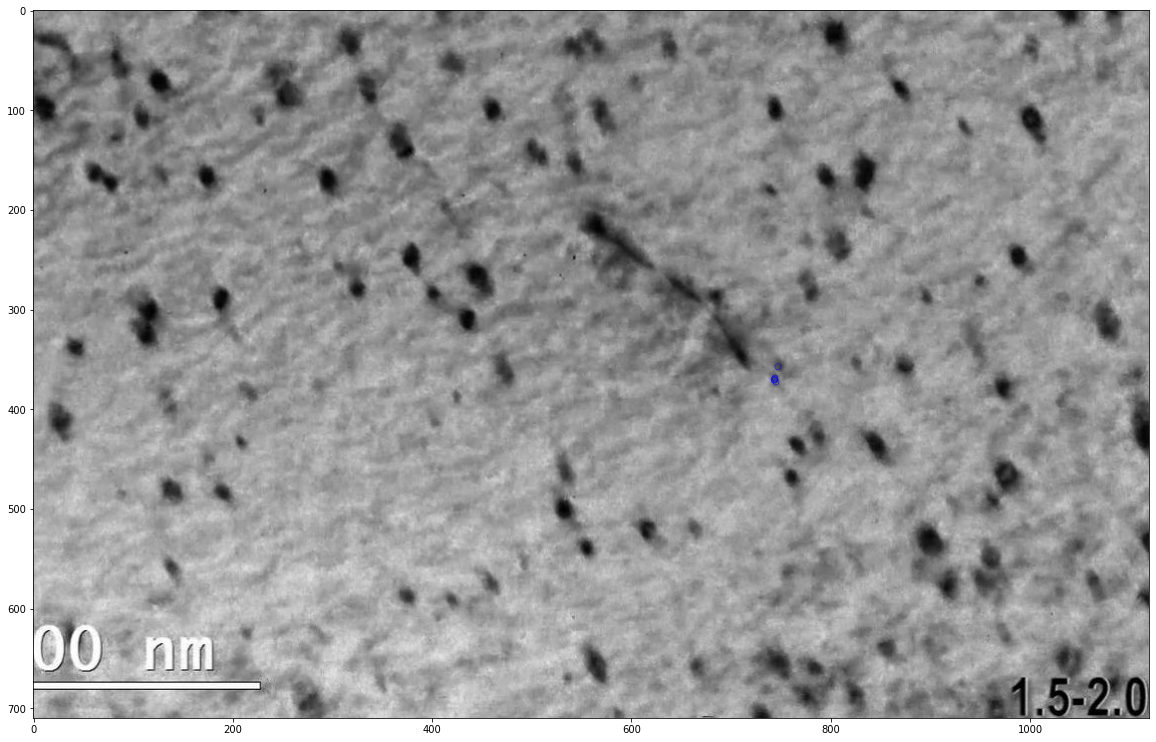

In [6]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

radius=10
im=plt.imread("./frame_crop/Frame580.jpg")
fig, ax = plt.subplots(figsize=(20, 20))
i=0

for item in particleDict[max_key]:

    if i%100==0:
        circ= patches.Circle((item[2],item[1]),3, color='b',linewidth=0.5, fill=False)
        ax.add_patch(circ)
    i+=1
    ax.imshow(im)
fig.savefig("trajectory_circle.jpg",format='jpeg',dpi=300, bbox_inches="tight",pad_inches=0.2)
plt.close()